In [1]:
#Install of Pandas, IPYNB and IPython to this new Notebook. I installed import-ipynb to be able to call the Datasets that I had manipulated in the other Notebooks. I installed Ipython in an attempt to use Magic commands during my work on the visualisations later in this Notebook, in the end I found a way to create the visuals without needing this functionality.

!pip install pandas

!pip install import-ipynb

!pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Import of Pandas, import_ipynb and the 2 manipulated Datasets as ppi and aii respectively

import pandas as pd

import import_ipynb

import propertyPurchaseImport as ppi

import averageIncomeImport as aii

importing Jupyter notebook from propertyPurchaseImport.ipynb
importing Jupyter notebook from dataframeUtilities.ipynb
0   Year/Qrt National  Dublin      Cork   Galway Limerick Waterford Other Areas
1     1975Q1   11,887   11,858   10,667   13,519   12,565    11,090      11,428
2     1975Q2   12,837   12,804   12,131   14,306   12,714    12,366      12,956
3     1975Q3   13,269   13,153   12,567   14,248   13,643    12,526      13,521
4     1975Q4   13,892   13,835   14,194   15,176   13,337    13,516      13,812
5     1976Q1   14,738   14,770   13,829   17,086   14,776    14,066      14,650
..       ...      ...      ...      ...      ...      ...       ...         ...
161   2015Q1  267,517  360,876  234,073  253,163  235,717   242,671     234,831
162   2015Q2  275,235  388,609  257,612  229,154  232,603   188,120     246,937
163   2015Q3  285,015  373,518  259,694  242,043  233,816   225,367     256,773
164   2015Q4  298,551  387,963  266,279  237,350  227,033   214,044     269,337
16

In [3]:
#Merge of the 2 Datasets into one Dataset to allow for the values to relate to eachother

merged_table = pd.merge(ppi.trimmeddatahousing, aii.datawages, on='Time', how='inner')

In [4]:
#Check on the newly merged table

print(merged_table)

    Year/Qrt National  Dublin   ... PowerCode Code PowerCode         Value
0     1990Q1   65,366   78,269  ...              0     Units  15349.510969
1     1990Q2   64,700   81,624  ...              0     Units  15349.510969
2     1990Q3   66,772   85,497  ...              0     Units  15349.510969
3     1990Q4   65,425   78,292  ...              0     Units  15349.510969
4     1991Q1   67,007   80,914  ...              0     Units  16411.982778
..       ...      ...      ...  ...            ...       ...           ...
100   2015Q1  267,517  360,876  ...              0     Units  44106.001921
101   2015Q2  275,235  388,609  ...              0     Units  44106.001921
102   2015Q3  285,015  373,518  ...              0     Units  44106.001921
103   2015Q4  298,551  387,963  ...              0     Units  44106.001921
104   2016Q1  309,703  402,211  ...              0     Units  44901.182226

[105 rows x 19 columns]


In [5]:
#Manipulation of the merged table to remove the ',' in the price columns for the locations with nothing. This was in preperation for a further manipulation

merged_table['National'] = merged_table['National'].str.replace(',', '')
merged_table['Cork'] = merged_table['Cork'].str.replace(',', '')
merged_table['Galway'] = merged_table['Galway'].str.replace(',', '')
merged_table['Limerick'] = merged_table['Limerick'].str.replace(',', '')
merged_table['Waterford'] = merged_table['Waterford'].str.replace(',', '')
merged_table['Other Areas'] = merged_table['Other Areas'].str.replace(',', '')

#Check on the changes made to the locations prices columns

merged_table.head(10)

,Year/Qrt,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,Time,COUNTRY,Country,SERIES,Series,TIME,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,1990Q1,65366,"78,269",60231,66233,63717,51515,56277,1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,15349.510969
1,1990Q2,64700,"81,624",61185,67906,59727,52849,53210,1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,15349.510969
2,1990Q3,66772,"85,497",60800,68490,64898,56533,56411,1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,15349.510969
3,1990Q4,65425,"78,292",61935,69168,60945,55846,57127,1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,15349.510969
4,1991Q1,67007,"80,914",65286,67319,65253,53418,56892,1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,16411.982778
5,1991Q2,64974,"76,436",62132,62561,61756,51183,57320,1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,16411.982778
6,1991Q3,66694,"78,462",63462,67958,64593,52474,58970,1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,16411.982778
7,1991Q4,69070,"79,732",67248,69198,66471,56821,61186,1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,16411.982778
8,1992Q1,69688,"78,980",66805,72450,62776,55046,60898,1992,IRL,Ireland,CPNCU,Current prices in NCU,1992,EUR,Euro,0,Units,17601.759896
9,1992Q2,68764,"78,389",65162,71616,60768,52881,61591,1992,IRL,Ireland,CPNCU,Current prices in NCU,1992,EUR,Euro,0,Units,17601.759896


In [6]:
#Installing Matplotlib to begin the creation of my visuals from this new merged Dataset

!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


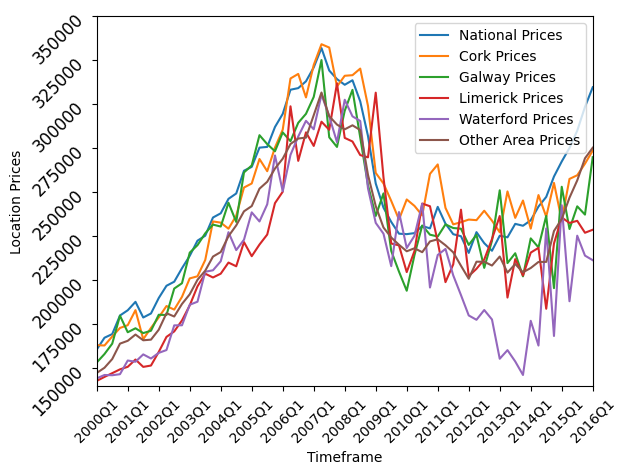

In [7]:
#Import of Matplotlib as plt to start creating my visuals. Additional import of IPython when it was thought that I might need it for the Magic commands but this goes unused.

import matplotlib.pyplot as plt

import IPython

#Converting the location prices columns into an int to use in the visual
merged_table['National'] = merged_table['National'].astype(int)
merged_table['Cork'] = merged_table['Cork'].astype(int)
merged_table['Galway'] = merged_table['Galway'].astype(int)
merged_table['Limerick'] = merged_table['Limerick'].astype(int)
merged_table['Waterford'] = merged_table['Waterford'].astype(int)
merged_table['Other Areas'] = merged_table['Other Areas'].astype(int)

#Creating the objects to be used within the first visual. I am looking to layer the 5 different lines on the graph to show the difference in the prices in the provided Irish locations during the Datasets timeframe 

x1 = merged_table['Year/Qrt']
y1 = merged_table['National']

x2 = merged_table['Year/Qrt']
y2 = merged_table['Cork']

x3 = merged_table['Year/Qrt']
y3 = merged_table['Galway']

x4 = merged_table['Year/Qrt']
y4 = merged_table['Limerick']

x5 = merged_table['Year/Qrt']
y5 = merged_table['Waterford']

x6 = merged_table['Year/Qrt']
y6 = merged_table['Other Areas']

#Plotting and labeling the new lines for the graph using the created objects. Also includes label creation for later legend creation

plt.plot(x1, y1, label='National Prices')
plt.plot(x2, y2, label='Cork Prices')
plt.plot(x3, y3, label='Galway Prices')
plt.plot(x4, y4, label='Limerick Prices')
plt.plot(x5, y5, label='Waterford Prices')
plt.plot(x6, y6, label='Other Area Prices')

#Rotation and Fontsize change for the ticks in the graph to allow for the 'xticks' mainly to be read more easily but the Rotation was done for all to keep uniformity on the graphs and as a small style choise

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

#Creating the labels for the 'x' and 'y' axis as well as the creation of the legend for the graph to assist in understanding the data
plt.xlabel('Timeframe')
plt.ylabel('Location Prices')
plt.legend()

#Altering the 'x' axis shown ticks to only be every 4th, this further assists the user in allowing the ticks to be bigger without cluttering the graph with too many tick values showing

plt.xticks(range(0, len(x1), 4))

#Altering the range for the data to ensure that the information could be read by users. To this effect, the Timeframe was limited to a 16 year span and the Location Prices were limited to just allow price range within the Timeframe

x_min, x_max = '2000Q1', x1.max()
y_min, y_max = 140000, 350000
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#Showing the plotted graph below, detailing the Irish housing prices between 2000 and 2016

plt.show()

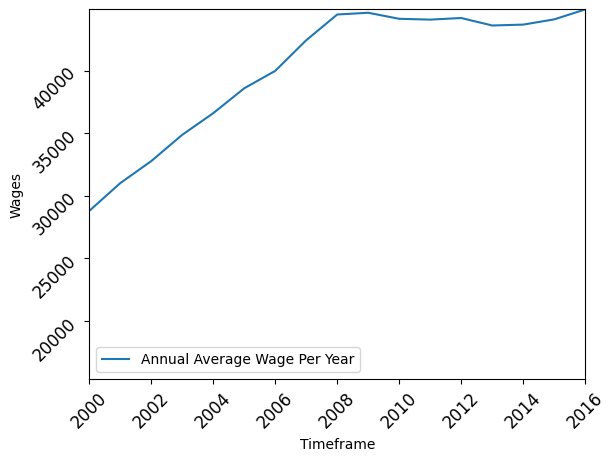

In [8]:
#Change made to the 'Value' column which is the average wages for Irish people during a timeframe

merged_table['Value'] = merged_table['Value'].astype(int)

#Creating objects to use in the new graph

x = merged_table['Time']
y = merged_table['Value']

#Plotting and Labelling the new graph

plt.plot(x,y,label='Annual Average Wage Per Year' )

#Tick manipulation

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Axis labelling and Legend creation

plt.xlabel('Timeframe')
plt.ylabel('Wages')
plt.legend()

#Range manipulation to coincide with the previous graph

x_min, x_max = 2000, x.max()
y_min, y_max = y.min(), y.max()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#Showing the new graph

plt.show()

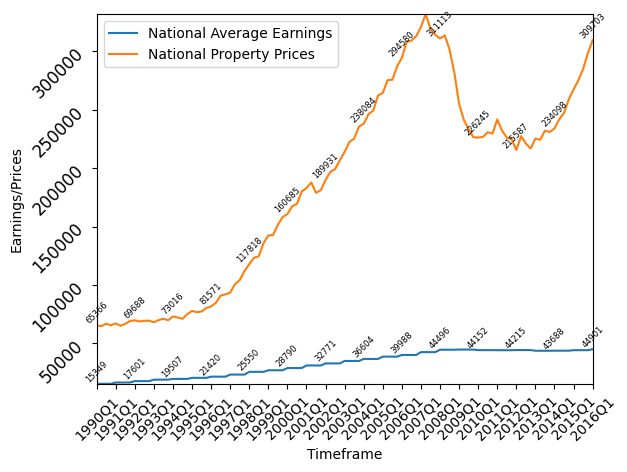

In [12]:
#Change made to the 'Value' & 'National' column to be int

merged_table['National'] = merged_table['National'].astype(int)
merged_table['Value'] = merged_table['Value'].astype(int)

#Object creation for the new graph. In this graph we will be stacking the national house prices on the same graph as a line showing the average wage to show the disparity in growth between the 2 values

x1 = merged_table['Year/Qrt']
y1 = merged_table['Value']

x2 = merged_table['Year/Qrt']
y2 = merged_table['National']

#Plotting the lines and labelling

plt.plot(x1, y1, label='National Average Earnings')
plt.plot(x2, y2, label='National Property Prices')

#Here, a for loop is used to check for every 8th element of the object and then on the 8th, plot text on the graph line. I also rotate and alter the size of the called element to make it easier to read.

for i1, j1 in zip(x1[::8], y1[::8]):
    plt.text(i1, j1, str(j1), ha='center', va='bottom', rotation=45, fontsize=6)

for i2, j2 in zip(x2[::8], y2[::8]):
    plt.text(i2, j2, str(j2), ha='center', va='bottom', rotation=45, fontsize=6)
    
#Ticks manipulation

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

#Label and Legend creation

plt.xlabel('Timeframe')
plt.ylabel('Earnings/Prices')
plt.legend()

#Altering the ticks to ensure that only every 4th with show on the 'x' axis

plt.xticks(range(0, len(x1), 4))

#Range manipulation

x_min, x_max = x1.min(), x2.max()
y_min, y_max = y1.min(), y2.max()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#Showing the final graph. This graph shows that the average irish wage nationally, has not increased at the same overall rate relitive to the national property prices  

plt.show()